<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
import csv
print('Opening File. Data: sat_scores.csv')
sat_list = []
with open('./sat_scores.csv') as f:
    reader = csv.reader(f)
    for row in reader:
        sat_list.append(row)
f.close()
print ('file closed')

Opening File. Data: sat_scores.csv
file closed


In [3]:
#Check what the data looks like
sat_list[:5]

[['State', 'Rate', 'Verbal', 'Math'],
 ['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505']]

In [4]:
#Create the dictionary of State statistics
sat_dict= {sat_list[0][index]:[column[index] for column in sat_list[1:]] for index in range(4)}

In [5]:
#Check for duplicate states
assert len(sat_list[1:])==len(sat_dict['State'])

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [6]:
#Convert the dictionary to a DataFrame
sat_dict_df = pd.DataFrame(sat_dict)

In [7]:
#Check dtypes
sat_dict_df.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

In [8]:
#Create DataFrame directly form the csv file
sat_df = pd.read_csv('./sat_scores.csv')

In [9]:
#Check dtypes
sat_df.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [10]:
#Check for null values
sat_df.isnull().sum()

State     0
Rate      0
Verbal    0
Math      0
dtype: int64

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [11]:
sat_df.head()

State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516

In [12]:
sat_df.tail()

State  Rate  Verbal  Math
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551
51   All    45     506   514

In [13]:
#Drop the last entry since it is a summary of all states.
sat_df.drop(index = 51, inplace = True)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [14]:
sat_df.shape

(51, 4)

In [15]:
sat_data_dict = {
                    
                    'Shape':(51,4),
                    'Columns':['State','Rate','Verbal','Math'],
    
                    'State':{
                                'Type':'string',
                                'About':'The state from where the results were recorded.'
                            },
                    'Rate':{
                                'Type':'integer',
                                'About':'Rate of participation by the state'
                            },
                    'Verbal':{
                                'Type':'integer',
                                'About':'Average scores for oral communication for participants from the state'
                            },
                    'Math':{
                                'Type':'integer',
                                'About':'Average scores for oral communication for participants from the state'
                            }
                     
                }

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

Text(0.5, 1.0, 'Distribution of Math scores')

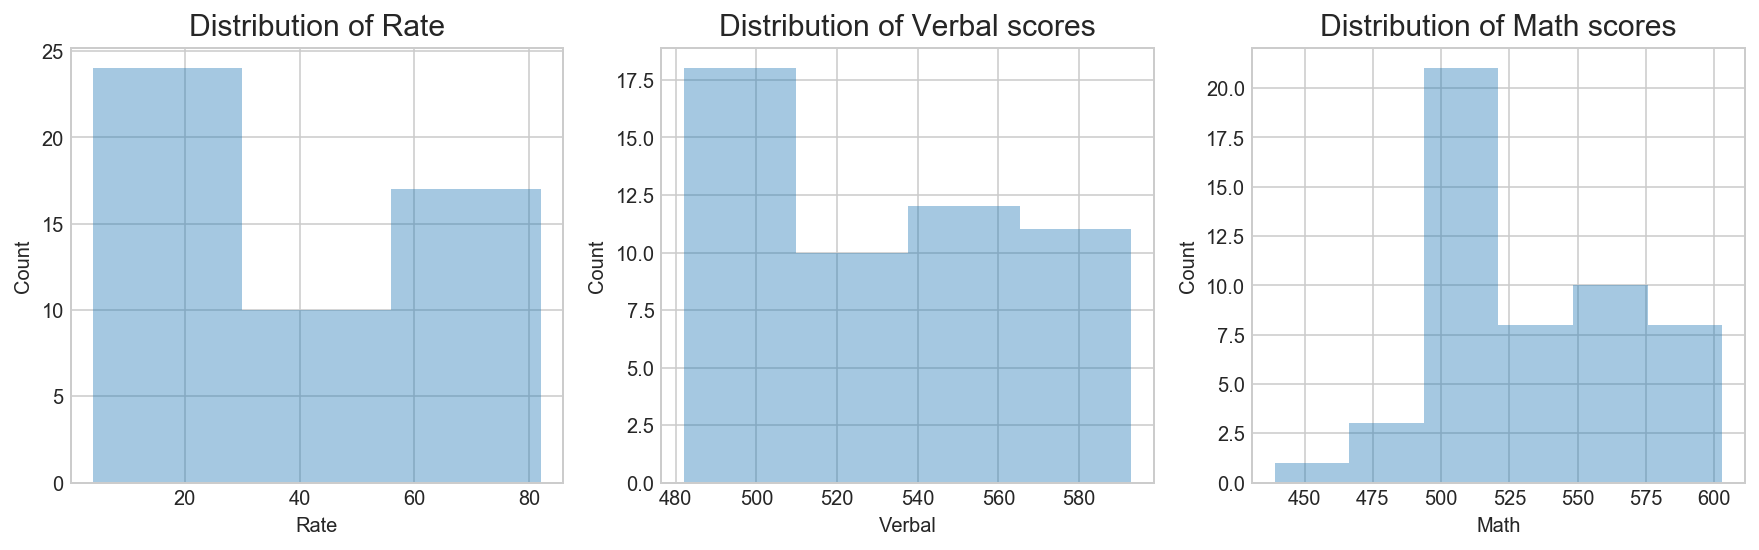

In [16]:
#import seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

#Set up the figure and axes
fig = plt.figure(figsize=(15,4))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)

#Create the 3 plots on separate axes
sns.distplot(sat_df['Rate'], kde = False,ax=ax1)
sns.distplot(sat_df['Verbal'], kde = False,ax=ax2)
sns.distplot(sat_df['Math'], kde = False,ax=ax3)

#Label the plots
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Rate', fontsize=15)
ax2.set_ylabel('Count')
ax2.set_title('Distribution of Verbal scores', fontsize=15)
ax3.set_ylabel('Count')
ax3.set_title('Distribution of Math scores', fontsize=15)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

Text(0.5, 0.98, 'Joint Distributions between Rate, Math and Verbal')

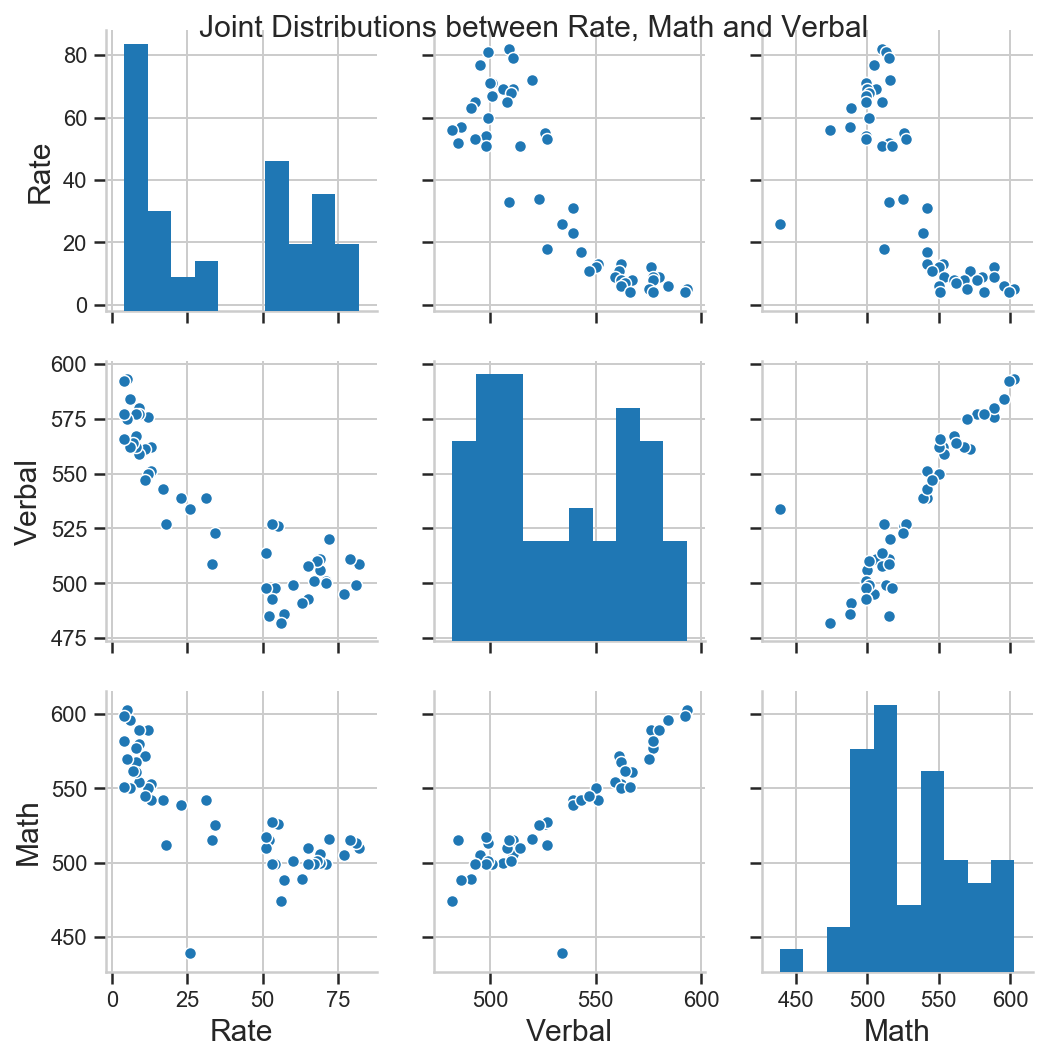

In [17]:
#Plot the join distributions between Rate, Math and Verbal
sns.set_context("notebook", rc={"axes.labelsize":15})
sns.pairplot(sat_df)
plt.suptitle('Joint Distributions between Rate, Math and Verbal', fontsize=15)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 <a list of 10 Text yticklabel objects>)

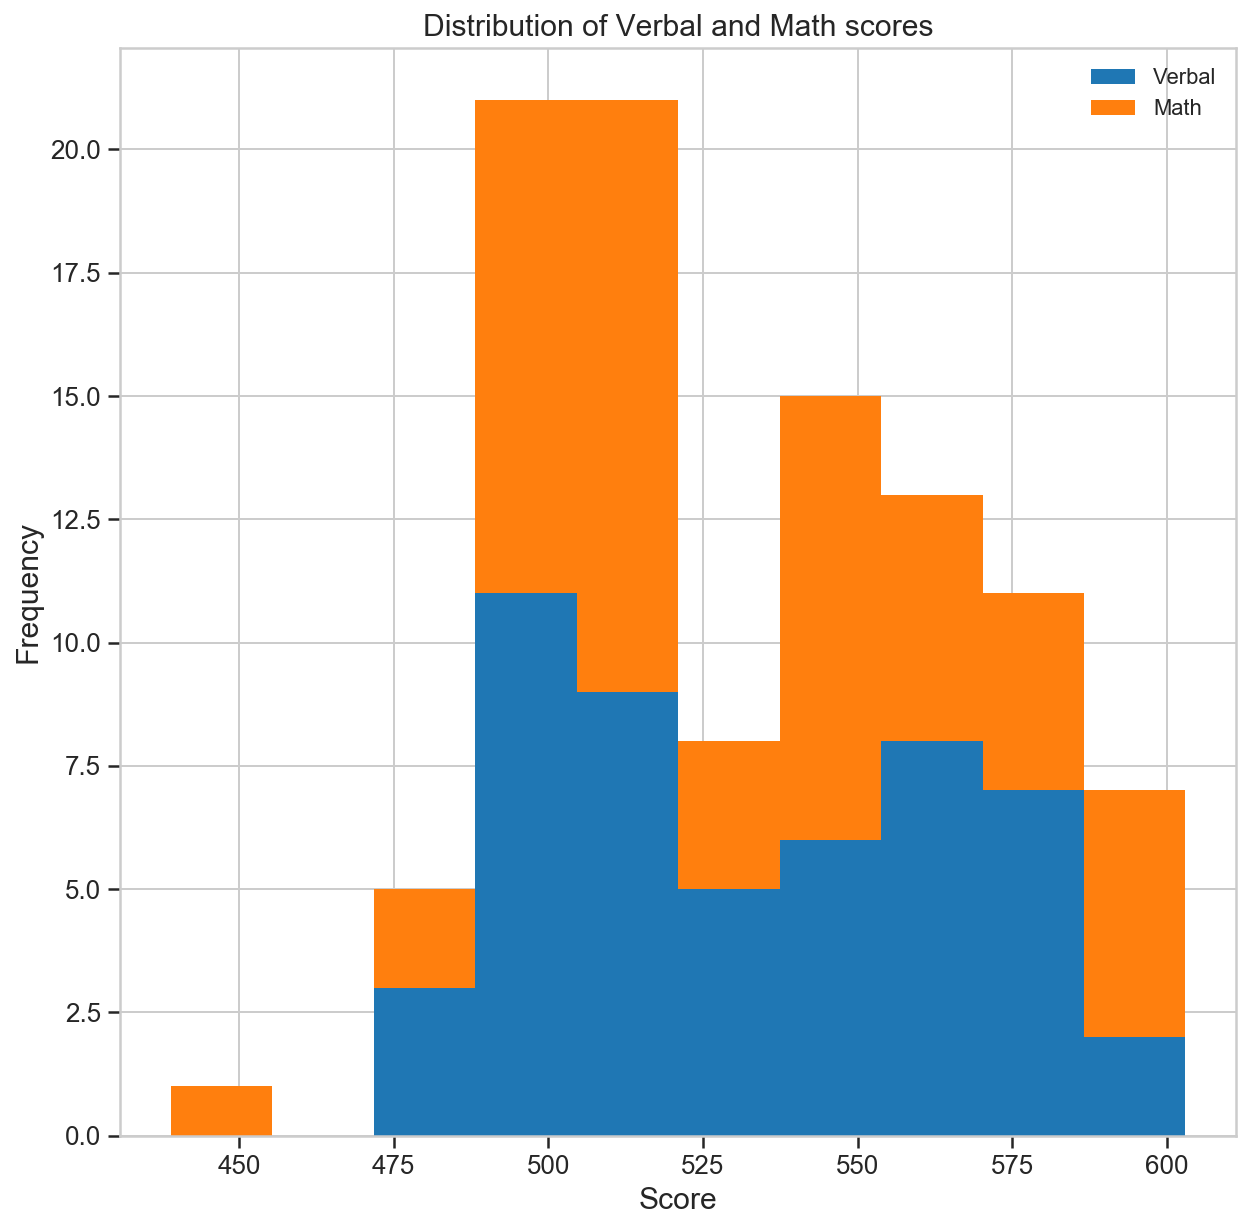

In [18]:
#PLot a stacked histogram of Verbal and Math
fig,ax = plt.subplots(figsize=(10,10))
sat_df[['Verbal','Math']].plot(kind='hist', stacked=True, ax=ax)

#Set the title and labels
plt.title('Distribution of Verbal and Math scores', fontsize=15)
plt.xlabel('Score',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

(array([425., 450., 475., 500., 525., 550., 575., 600., 625.]),
 <a list of 9 Text yticklabel objects>)

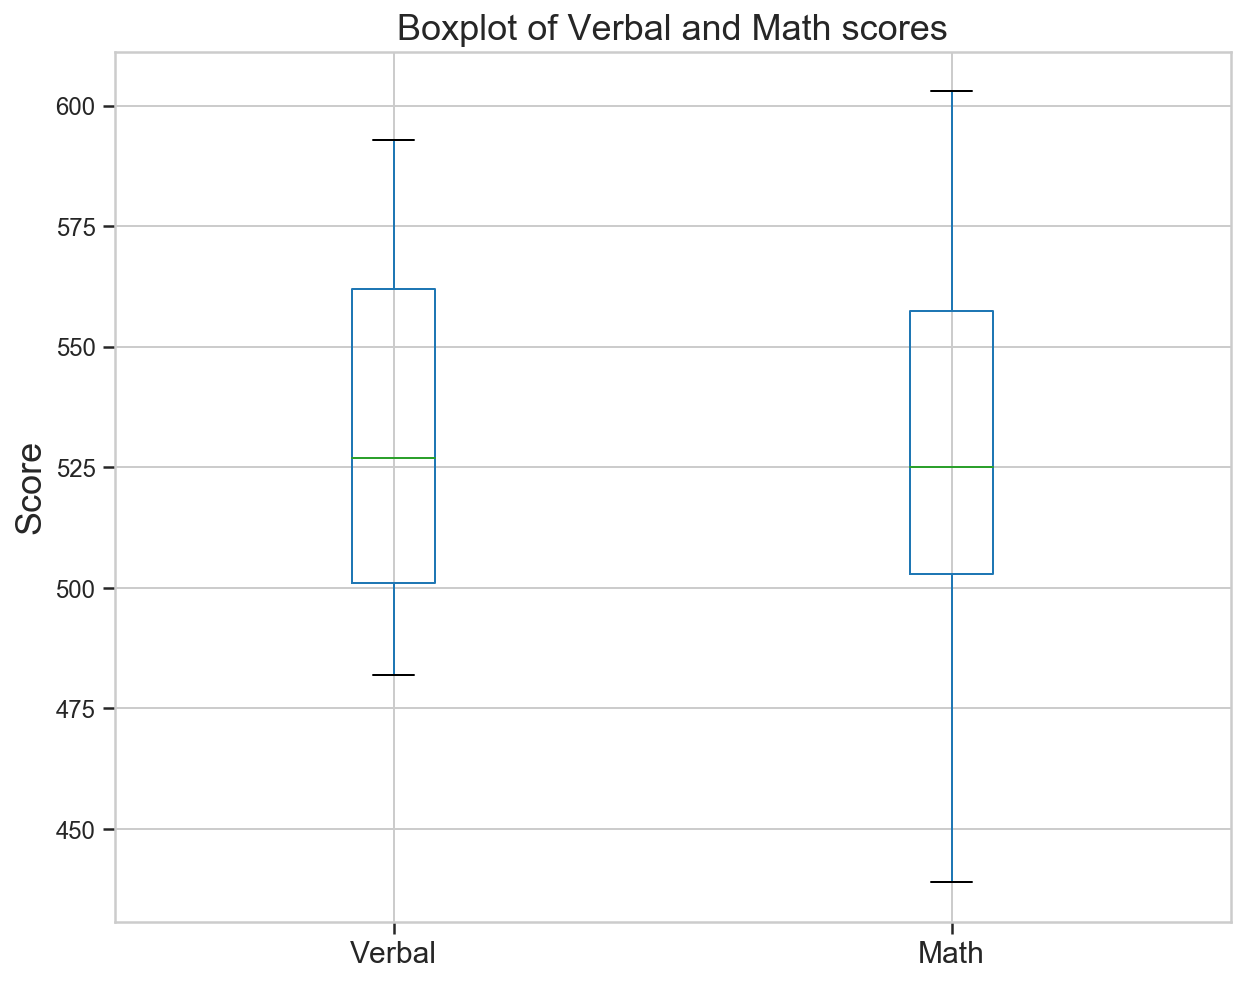

In [19]:
#Plot the boxplots of both Verbal and Math
fig = sat_df[['Verbal','Math']].plot(kind='box', figsize=(10,8))

#Set the title and labels
plt.title('Boxplot of Verbal and Math scores', fontsize=18)
plt.ylabel('Score',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)

## Answer

Boxplots also show the quartiles and outliers(points beyond the whiskers) while scatterplots and histograms will give more information about the mode. 

Since rate is ona scale of 1-100 while Math and Verbal are from about 400 - 650, the axis will change from about 425-625 to 1-625. As such, the boxplot will appear much smaller and will be very hard to read. It may be hard to separate the different values and quartiles as they would be much closer to each other.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [20]:
#Standardise the scores by
sat_df['Stand Math']=sat_df['Math'].apply(lambda x:((x-sat_df['Math'].mean())/sat_df['Math'].std()))
sat_df['Stand Verbal']=sat_df['Verbal'].apply(lambda x:((x-sat_df['Verbal'].mean())/sat_df['Verbal'].std()))
sat_df['Stand Rate']=sat_df['Rate'].apply(lambda x:((x-sat_df['Rate'].mean())/sat_df['Rate'].std()))

Text(0, 0.5, 'Deviation from mean')

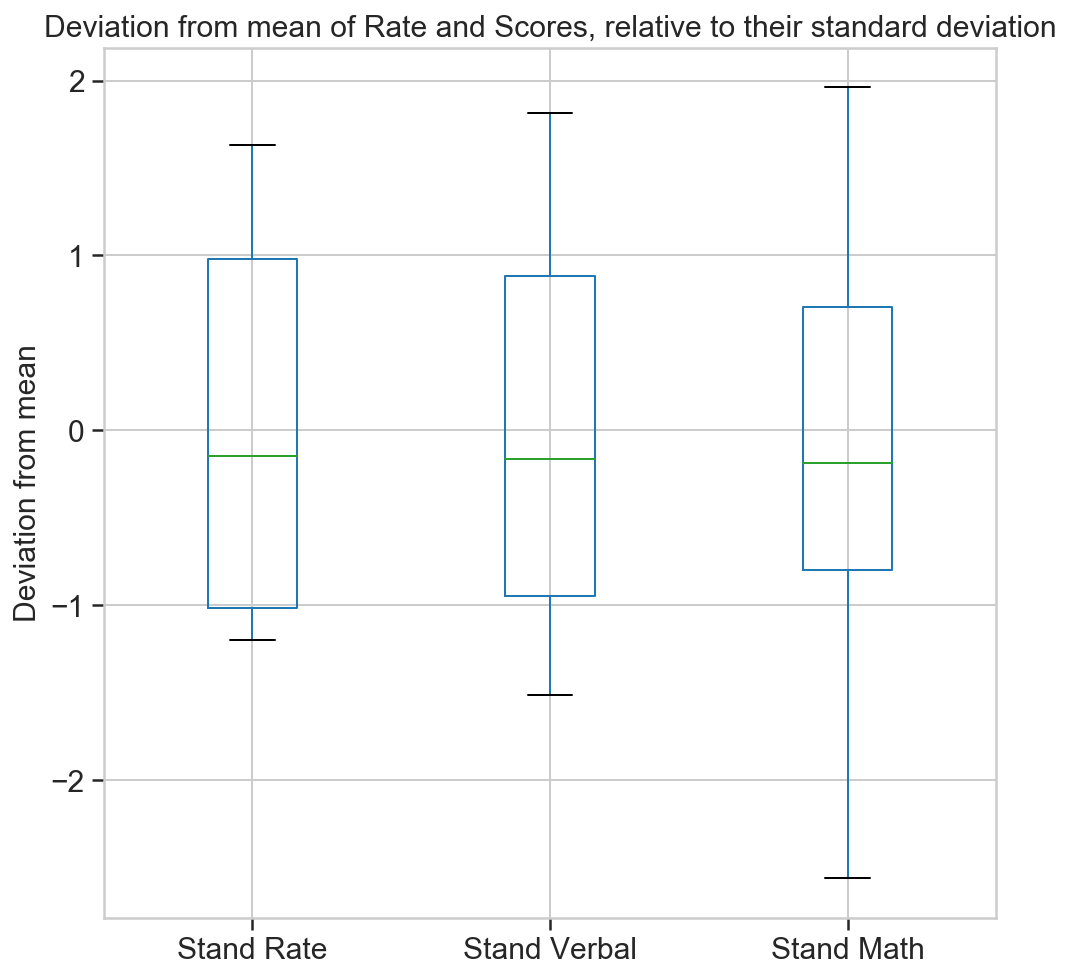

In [21]:
#Plot the standardised 
fig = sat_df[['Stand Rate','Stand Verbal','Stand Math']].plot(kind='box',figsize = (8,8), fontsize=15)

#Set the title and labels
plt.title('Deviation from mean of Rate and Scores, relative to their standard deviation',fontsize = 15)
plt.ylabel('Deviation from mean', fontsize = 15)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [22]:
#Create a list of states with score above the average verbal score
verbal_above_mean = sat_df[sat_df['Verbal']>sat_df['Verbal'].mean()]['State'].tolist()

#Show the list of states
verbal_above_mean

['CO',
 'OH',
 'MT',
 'ID',
 'TN',
 'NM',
 'IL',
 'KY',
 'WY',
 'MI',
 'MN',
 'KS',
 'AL',
 'NE',
 'OK',
 'MO',
 'LA',
 'WI',
 'AR',
 'UT',
 'IA',
 'SD',
 'ND',
 'MS']

In [23]:
#Check the number of states in the list
print('No. of states: ',len(verbal_above_mean))

No. of states:  24


### Answer

There are 24 states with verbal scores above the average. Since there are 51 states and close to half are above the average, this suggest that the distribution should be symmetrical.

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [24]:
#Create a list of states with score above the median verbal score
verbal_above_median = sat_df[sat_df['Verbal']>sat_df['Verbal'].median()]['State'].tolist()

#Check the number of states in the list
print('No. of states: ',len(verbal_above_median))

No. of states:  24


In [25]:
#Check the lists against each other
assert verbal_above_mean == verbal_above_median

### Answer
The lists are exactly the same. This is due to the median being very close to the mean.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [26]:
#Introduce a new column with values of Verbal minus Math
sat_df['V-M'] = sat_df['Verbal']-sat_df['Math']

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [27]:
#Create DataFrame with 10 states whose verbal scores have the highest postive difference than Math
vm_top_10 = sat_df[['State','Rate','Verbal','Math','V-M']].sort_values(['V-M'],ascending = False).head(10)
vm_top_10.set_index(np.arange(1,11),inplace=True)

In [28]:
#Print the top 3 states where Verbal is greater than Math
print(vm_top_10.head(3))

  State  Rate  Verbal  Math  V-M
1    OH    26     534   439   95
2    MS     4     566   551   15
3    WV    18     527   512   15


In [29]:
#Create new column with values of 
sat_df['M-V'] = sat_df['V-M']*-1
mv_top_10 = sat_df[['State','Rate','Math','Verbal','M-V']].sort_values(['M-V'],ascending = False).head(10)
mv_top_10.set_index(np.arange(1,11),inplace=True)

In [30]:
#Print the top 3 states where Math is greater than Verbal
print(mv_top_10.head(3))

  State  Rate  Math  Verbal  M-V
1    HI    52   515     485   30
2    CA    51   517     498   19
3    NJ    81   513     499   14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [31]:
sat_df.loc[:,'Rate':'Math'].corr()

Rate    Verbal      Math
Rate    1.000000 -0.888121 -0.773419
Verbal -0.888121  1.000000  0.899909
Math   -0.773419  0.899909  1.000000

## Answer

The correlation matrix shows that Verbal and Math scores show a high positive correlation; those who score well in Verbal tend to score well in Math as well and vice versa. 
The opposite is true for participation and scores, with a negative correlation between them. Higher participation rates coincide with lower Verbal and Math scores.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [32]:
sat_df.describe()

Rate      Verbal        Math    Stand Math  Stand Verbal  \
count  51.000000   51.000000   51.000000  5.100000e+01  5.100000e+01   
mean   37.000000  532.529412  531.843137 -8.424634e-16  9.447780e-16   
std    27.550681   33.360667   36.287393  1.000000e+00  1.000000e+00   
min     4.000000  482.000000  439.000000 -2.558551e+00 -1.514640e+00   
25%     9.000000  501.000000  503.000000 -7.948528e-01 -9.451073e-01   
50%    33.000000  527.000000  525.000000 -1.885817e-01 -1.657464e-01   
75%    64.000000  562.000000  557.500000  7.070462e-01  8.833932e-01   
max    82.000000  593.000000  603.000000  1.960925e+00  1.812631e+00   

         Stand Rate        V-M        M-V  
count  5.100000e+01  51.000000  51.000000  
mean   8.707632e-18   0.686275  -0.686275  
std    1.000000e+00  15.839811  15.839811  
min   -1.197793e+00 -30.000000 -95.000000  
25%   -1.016309e+00  -6.000000  -4.500000  
50%   -1.451870e-01   0.000000   0.000000  
75%    9.800121e-01   4.500000   6.000000  
max    1.633353e+00  95.000000  30.000000

## Answer

count: The number of non-null elements in the column  
mean: Average value of all the non-null elements in the column.  
std: Standard deviation of all the non-null elements in the column.  
min: Value of the smallest non-null element in the column.  
25%: Value under which, after sorting values in ascending order, the first 25% of non-null values can be found.  
50%: Value under which, after sorting values in ascending order, the first 50% of non-null values can be found.  
75%: Value under which, after sorting values in ascending order, the first 75% of non-null values can be found.  
max: Value of the largest non-null element in the column.  

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [33]:
#Assign and print the covariance matrix for the dataset
sat_df_covariance = sat_df.cov()
print(sat_df_covariance)

                    Rate       Verbal         Math  Stand Math  Stand Verbal  \
Rate          759.040000  -816.280000  -773.220000  -21.308227    -24.468336   
Verbal       -816.280000  1112.934118  1089.404706   30.021575     33.360667   
Math         -773.220000  1089.404706  1316.774902   36.287393     32.655363   
Stand Math    -21.308227    30.021575    36.287393    1.000000      0.899909   
Stand Verbal  -24.468336    33.360667    32.655363    0.899909      1.000000   
Stand Rate     27.550681   -29.628306   -28.065368   -0.773419     -0.888121   
V-M           -43.060000    23.529412  -227.370196   -6.265818      0.705304   
M-V            43.060000   -23.529412   227.370196    6.265818     -0.705304   

              Stand Rate         V-M         M-V  
Rate           27.550681  -43.060000   43.060000  
Verbal        -29.628306   23.529412  -23.529412  
Math          -28.065368 -227.370196  227.370196  
Stand Math     -0.773419   -6.265818    6.265818  
Stand Verbal   -0.888121

### 1. Describe how the covariance matrix is different from the correlation matrix.
The covariance matrix is not bound between -1 and 1, unlike the correlation. The values in the covariance matrix also have units, unlike the correlation values which are unitless.

### 2. What is the process to convert the covariance into the correlation?

The process of converting covariance to correlation involves dividing the covariance by the product of the standard deviations of the variables involved.

### 3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

Correlation is a unitless measurement, as it is scaled by the standard deviations of the variables, causing it to fall between the correlation -1 and 1. This gives it a better indication of strength of relationship between the variables as different correlations can be compared against each other regardless of the original variables' units. 

The covariance between different variables cannot be compared as the units involved have a big impact on the values derived, making relative comparisons of magnitude meaningless.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [34]:
#Load the dataset
drug_df = pd.read_csv('./drug-use-by-age.csv')

In [35]:
#Take a look at the first 5 entries
drug_df.head()

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0  12  2798          3.9                3.0            1.1   
1  13  2757          8.5                6.0            3.4   
2  14  2792         18.1                5.0            8.7   
3  15  2956         29.2                6.0           14.5   
4  16  3058         40.1               10.0           22.5   

   marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
0                  4.0          0.1               5.0        0.0   
1                 15.0          0.1               1.0        0.0   
2                 24.0          0.1               5.5        0.0   
3                 25.0          0.5               4.0        0.1   
4                 30.0          1.0               7.0        0.0   

  crack-frequency        ...          oxycontin-use oxycontin-frequency  \
0               -        ...                    0.1                24.5   
1             3.0        ...                    0.1                41.0   
2               -        ...                    0.4                 4.5   
3             9.5        ...                    0.8                 3.0   
4             1.0        ...                    1.1                 4.0   

   tranquilizer-use  tranquilizer-frequency  stimulant-use  \
0               0.2                    52.0            0.2   
1               0.3                    25.5            0.3   
2               0.9                     5.0            0.8   
3               2.0                     4.5            1.5   
4               2.4                    11.0            1.8   

  stimulant-frequency  meth-use  meth-frequency  sedative-use  \
0                 2.0       0.0               -           0.2   
1                 4.0       0.1             5.0           0.1   
2                12.0       0.1            24.0           0.2   
3                 6.0       0.3            10.5           0.4   
4                 9.5       0.3            36.0           0.2   

  sedative-frequency  
0               13.0  
1               19.0  
2               16.5  
3               30.0  
4                3.0  

[5 rows x 28 columns]

In [36]:
#Take a look at the last 5 entries
drug_df.tail()

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
12  26-29  2628         80.7               52.0           20.8   
13  30-34  2864         77.5               52.0           16.4   
14  35-49  7391         75.0               52.0           10.4   
15  50-64  3923         67.2               52.0            7.3   
16    65+  2448         49.3               52.0            1.2   

    marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
12                 52.0          3.2               5.0        0.4   
13                 72.0          2.1               8.0        0.5   
14                 48.0          1.5              15.0        0.5   
15                 52.0          0.9              36.0        0.4   
16                 36.0          0.0                 -        0.0   

   crack-frequency        ...          oxycontin-use oxycontin-frequency  \
12             6.0        ...                    1.2                13.5   
13            15.0        ...                    0.9                46.0   
14            48.0        ...                    0.3                12.0   
15            62.0        ...                    0.4                 5.0   
16               -        ...                    0.0                   -   

    tranquilizer-use  tranquilizer-frequency  stimulant-use  \
12               4.2                    10.0            2.3   
13               3.6                     8.0            1.4   
14               1.9                     6.0            0.6   
15               1.4                    10.0            0.3   
16               0.2                     5.0            0.0   

   stimulant-frequency  meth-use  meth-frequency  sedative-use  \
12                 7.0       0.6            30.0           0.4   
13                12.0       0.4            54.0           0.4   
14                24.0       0.2           104.0           0.3   
15                24.0       0.2            30.0           0.2   
16               364.0       0.0               -           0.0   

   sedative-frequency  
12                4.0  
13               10.0  
14               10.0  
15              104.0  
16               15.0  

[5 rows x 28 columns]

In [37]:
#Check for data types and null values in columns
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [38]:
#Check how many columns are object types
drug_df.dtypes.value_counts()

float64    20
object      7
int64       1
dtype: int64

## Data Overview: 

Although there are no null values in every column, there are 6 columns (excluding age) with strings and with hypens instead of numbers. The hyphens will have to be replaced with null values in order for any aggregation or calculations to be done along the columns. The rows should not be dropped as there will be columns without null values that may be useful for analysis later on.

The 'age' column consists of both individual numbers and ranges, and even amongst the ranges, there are multiple ranges from 2 to as high as 14. 

The number of participants under each age group also differs across the dataset.

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [39]:
#replace the hyphens with null values.
drug_df[['cocaine-frequency','crack-frequency','heroin-frequency','inhalant-frequency','oxycontin-frequency','meth-frequency']]= drug_df[['cocaine-frequency','crack-frequency','heroin-frequency','inhalant-frequency','oxycontin-frequency','meth-frequency']].replace('-',np.nan)

In [40]:
#convert the string values to floats
drug_df[['cocaine-frequency','crack-frequency','heroin-frequency','inhalant-frequency','oxycontin-frequency','meth-frequency']]=drug_df[['cocaine-frequency','crack-frequency','heroin-frequency','inhalant-frequency','oxycontin-frequency','meth-frequency']].astype(float)

In [41]:
#Create a copy of the dataframe with just the average percentage of users.
drug_df_freq=drug_df[['age', 'n', 'alcohol-use', 'marijuana-use',
                           'cocaine-use', 'crack-use',
                           'heroin-use', 'hallucinogen-use',
                           'inhalant-use',
                           'pain-releiver-use', 'oxycontin-use',
                           'tranquilizer-use',
                           'stimulant-use', 'meth-use',
                           'sedative-use',]].copy()

The frequency variable is the median number of times a user in an age group used the substance in the past 12 months. However, it does not seem like a very representative statistic since it gives us information about the number of times **one** user used the specified substance in 12 months, and each age group has between 2223 and 7391 users. Therefore, the remaining EDA will focus on just the use statistic.  

In [42]:
#Rename column names for easier reading, and to correct a spelling error
drug_df_freq.columns = [ name.replace('-use','') for name in drug_df_freq.columns]
drug_df_freq.rename({'pain-releiver': 'pain reliever'},axis=1, inplace=True)

In [43]:
#Take a look at the DataFrame
drug_df_freq.head()

age     n  alcohol  marijuana  cocaine  crack  heroin  hallucinogen  \
0  12  2798      3.9        1.1      0.1    0.0     0.1           0.2   
1  13  2757      8.5        3.4      0.1    0.0     0.0           0.6   
2  14  2792     18.1        8.7      0.1    0.0     0.1           1.6   
3  15  2956     29.2       14.5      0.5    0.1     0.2           2.1   
4  16  3058     40.1       22.5      1.0    0.0     0.1           3.4   

   inhalant  pain reliever  oxycontin  tranquilizer  stimulant  meth  sedative  
0       1.6            2.0        0.1           0.2        0.2   0.0       0.2  
1       2.5            2.4        0.1           0.3        0.3   0.1       0.1  
2       2.6            3.9        0.4           0.9        0.8   0.1       0.2  
3       2.5            5.5        0.8           2.0        1.5   0.3       0.4  
4       3.0            6.2        1.1           2.4        1.8   0.3       0.2

In [44]:
#Get an overview of descriptive statistics
drug_df_freq.describe()

n    alcohol  marijuana    cocaine      crack     heroin  \
count    17.000000  17.000000  17.000000  17.000000  17.000000  17.000000   
mean   3251.058824  55.429412  18.923529   2.176471   0.294118   0.352941   
std    1297.890426  26.878866  11.959752   1.816772   0.235772   0.333762   
min    2223.000000   3.900000   1.100000   0.000000   0.000000   0.000000   
25%    2469.000000  40.100000   8.700000   0.500000   0.000000   0.100000   
50%    2798.000000  64.600000  20.800000   2.000000   0.400000   0.200000   
75%    3058.000000  77.500000  28.400000   4.000000   0.500000   0.600000   
max    7391.000000  84.200000  34.000000   4.900000   0.600000   1.100000   

       hallucinogen   inhalant  pain reliever  oxycontin  tranquilizer  \
count     17.000000  17.000000      17.000000  17.000000     17.000000   
mean       3.394118   1.388235       6.270588   0.935294      2.805882   
std        2.792506   0.927283       3.166379   0.608216      1.753379   
min        0.100000   0.000000       0.600000   0.000000      0.200000   
25%        0.600000   0.600000       3.900000   0.400000      1.400000   
50%        3.200000   1.400000       6.200000   1.100000      3.500000   
75%        5.200000   2.000000       9.000000   1.400000      4.200000   
max        8.600000   3.000000      10.000000   1.700000      5.400000   

       stimulant       meth   sedative  
count  17.000000  17.000000  17.000000  
mean    1.917647   0.382353   0.282353  
std     1.407673   0.262762   0.138000  
min     0.000000   0.000000   0.000000  
25%     0.600000   0.200000   0.200000  
50%     1.800000   0.400000   0.300000  
75%     3.000000   0.600000   0.400000  
max     4.100000   0.900000   0.500000

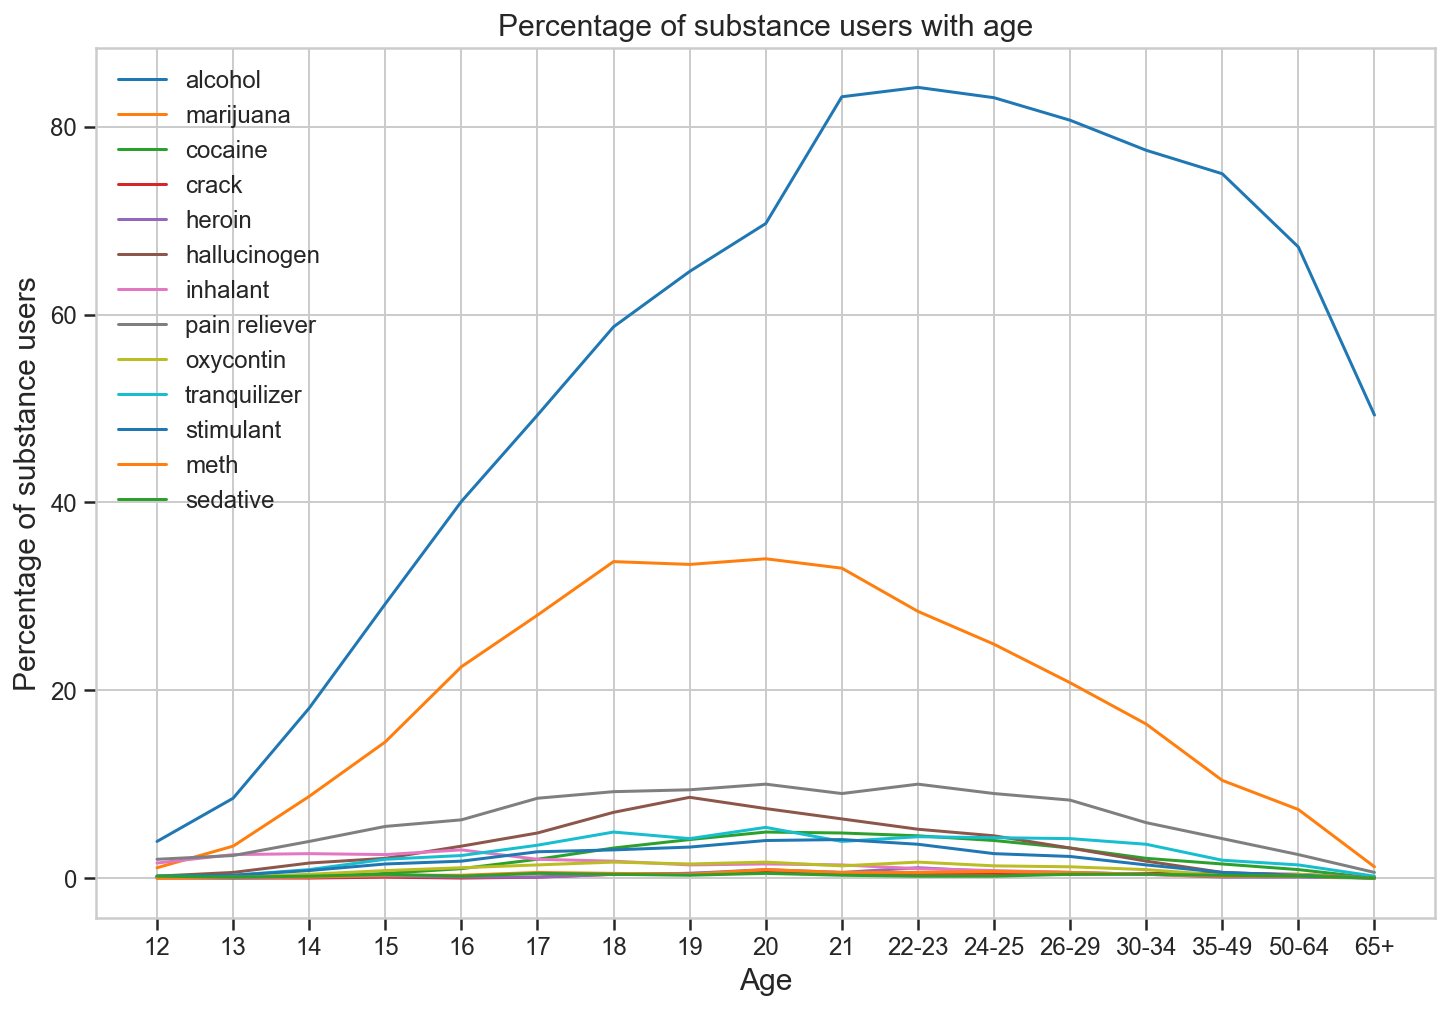

In [45]:
#Iterate through the list to plot the percentage substance use for the various substances
plt.figure(figsize=(12,8))
for column in drug_df_freq.columns[2:15]: 
    sns.lineplot(x='age',y=column,data=drug_df_freq, label=column)

#Set the title and labels
plt.title('Percentage of substance users with age', fontsize=15)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Percentage of substance users', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

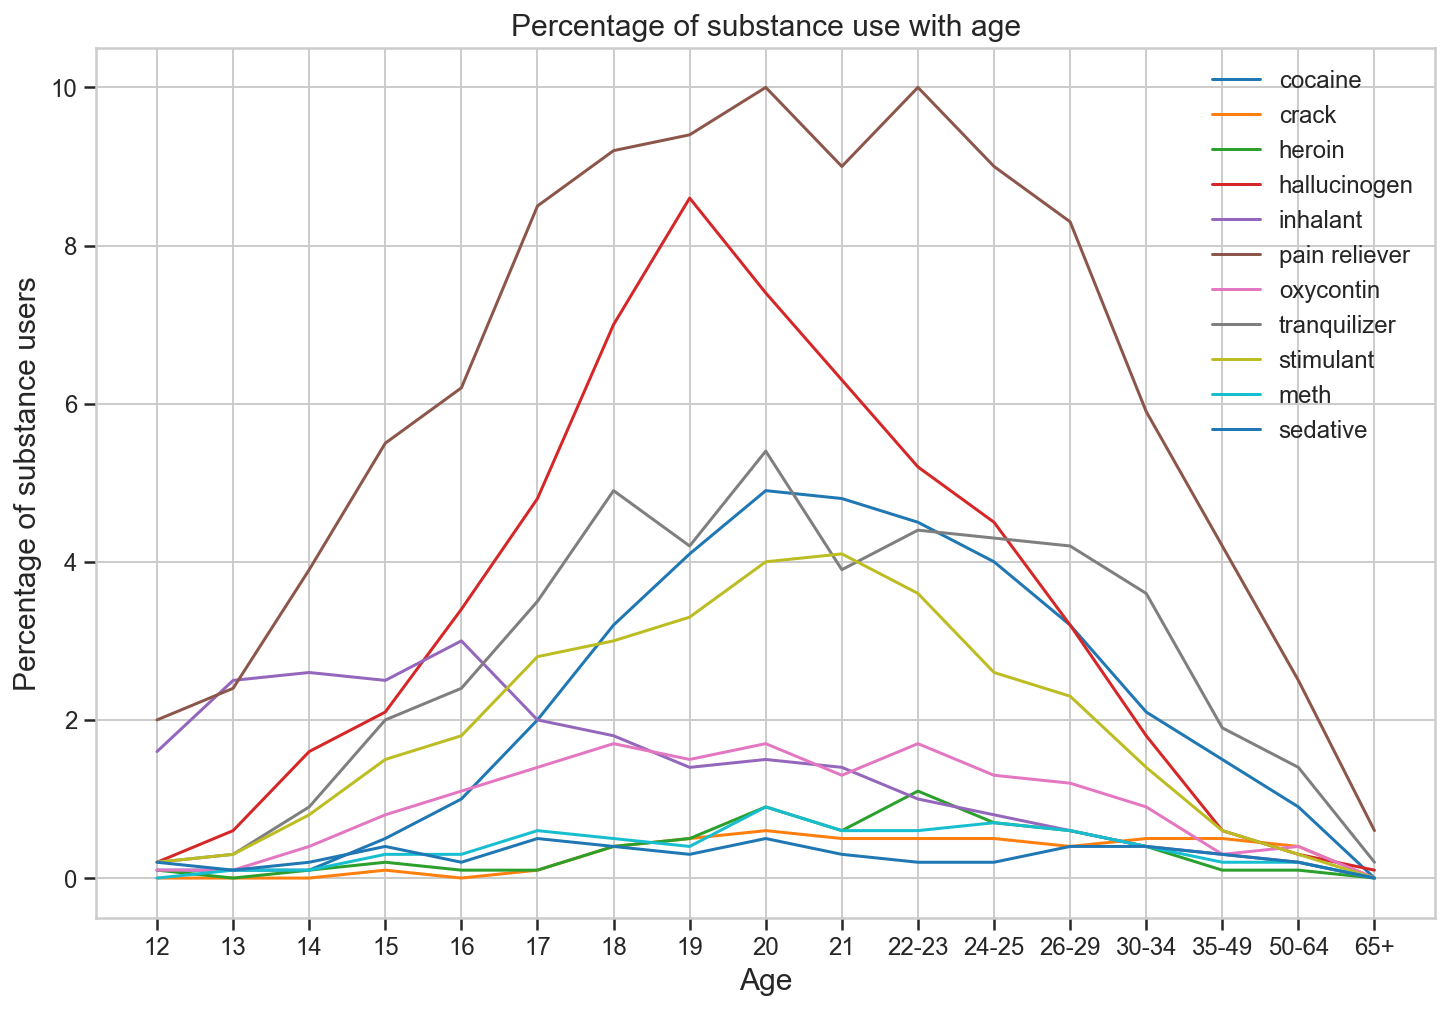

In [46]:
#Replot the graph without alochol and marijuana, which were much higher and compressed the display of the other substances
plt.figure(figsize=(12,8))
for column in drug_df_freq.columns[4:15]: 
    sns.lineplot(x='age',y=column,data=drug_df_freq, label=column)

#Set the title and labels
plt.title('Percentage of substance use with age', fontsize=15)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Percentage of substance users', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

In [47]:
#Create a copy of the DataFrame
drug_df_freq_stand=drug_df_freq.copy()

#Standardise all values
for column in drug_df_freq_stand.columns[2:15]:
    drug_df_freq_stand[column]=drug_df_freq_stand[column].apply(lambda x:((x-drug_df_freq_stand[column].mean())/drug_df_freq_stand[column].std()))

Text(0, 0.5, 'Standard Deviations from Mean \n (Percentage of substance users)')

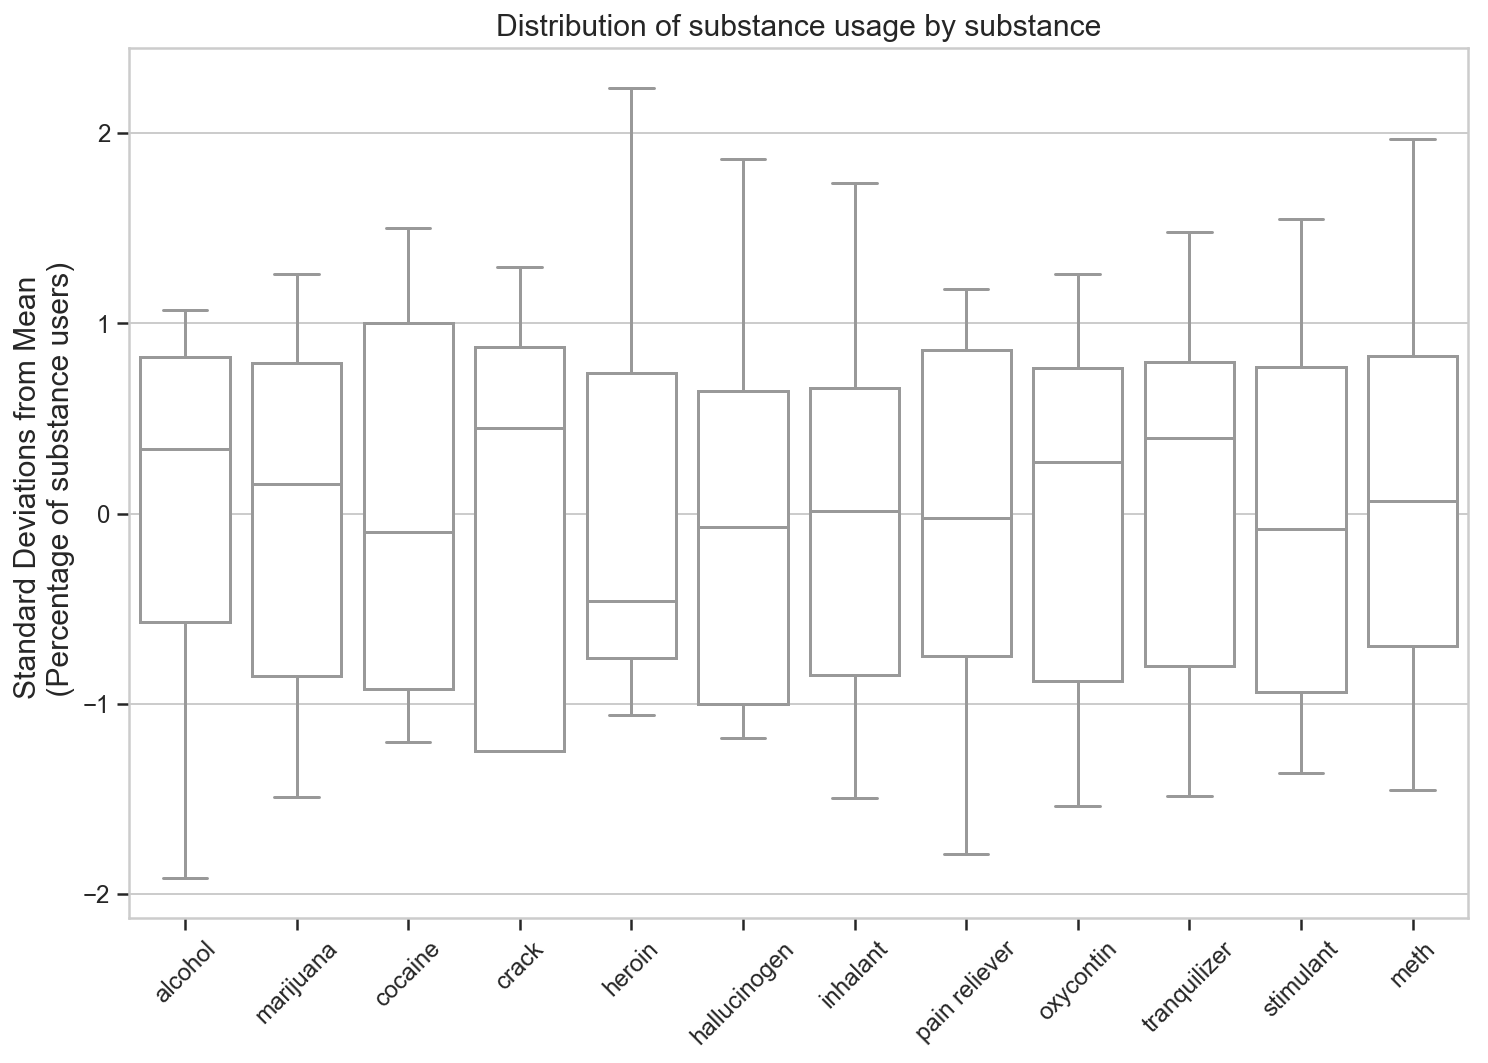

In [48]:
#Plot the boxplots of all standardised variables
plt.figure(figsize=(12,8))
sns.boxplot(data=drug_df_freq_stand.loc[:,'alcohol':'meth'],color='white')

#Set the title and labels
plt.title('Distribution of substance usage by substance', fontsize=15)
plt.xticks(fontsize=12,rotation=45)
plt.yticks(fontsize=12)
plt.ylabel('Standard Deviations from Mean \n (Percentage of substance users)',fontsize=15)

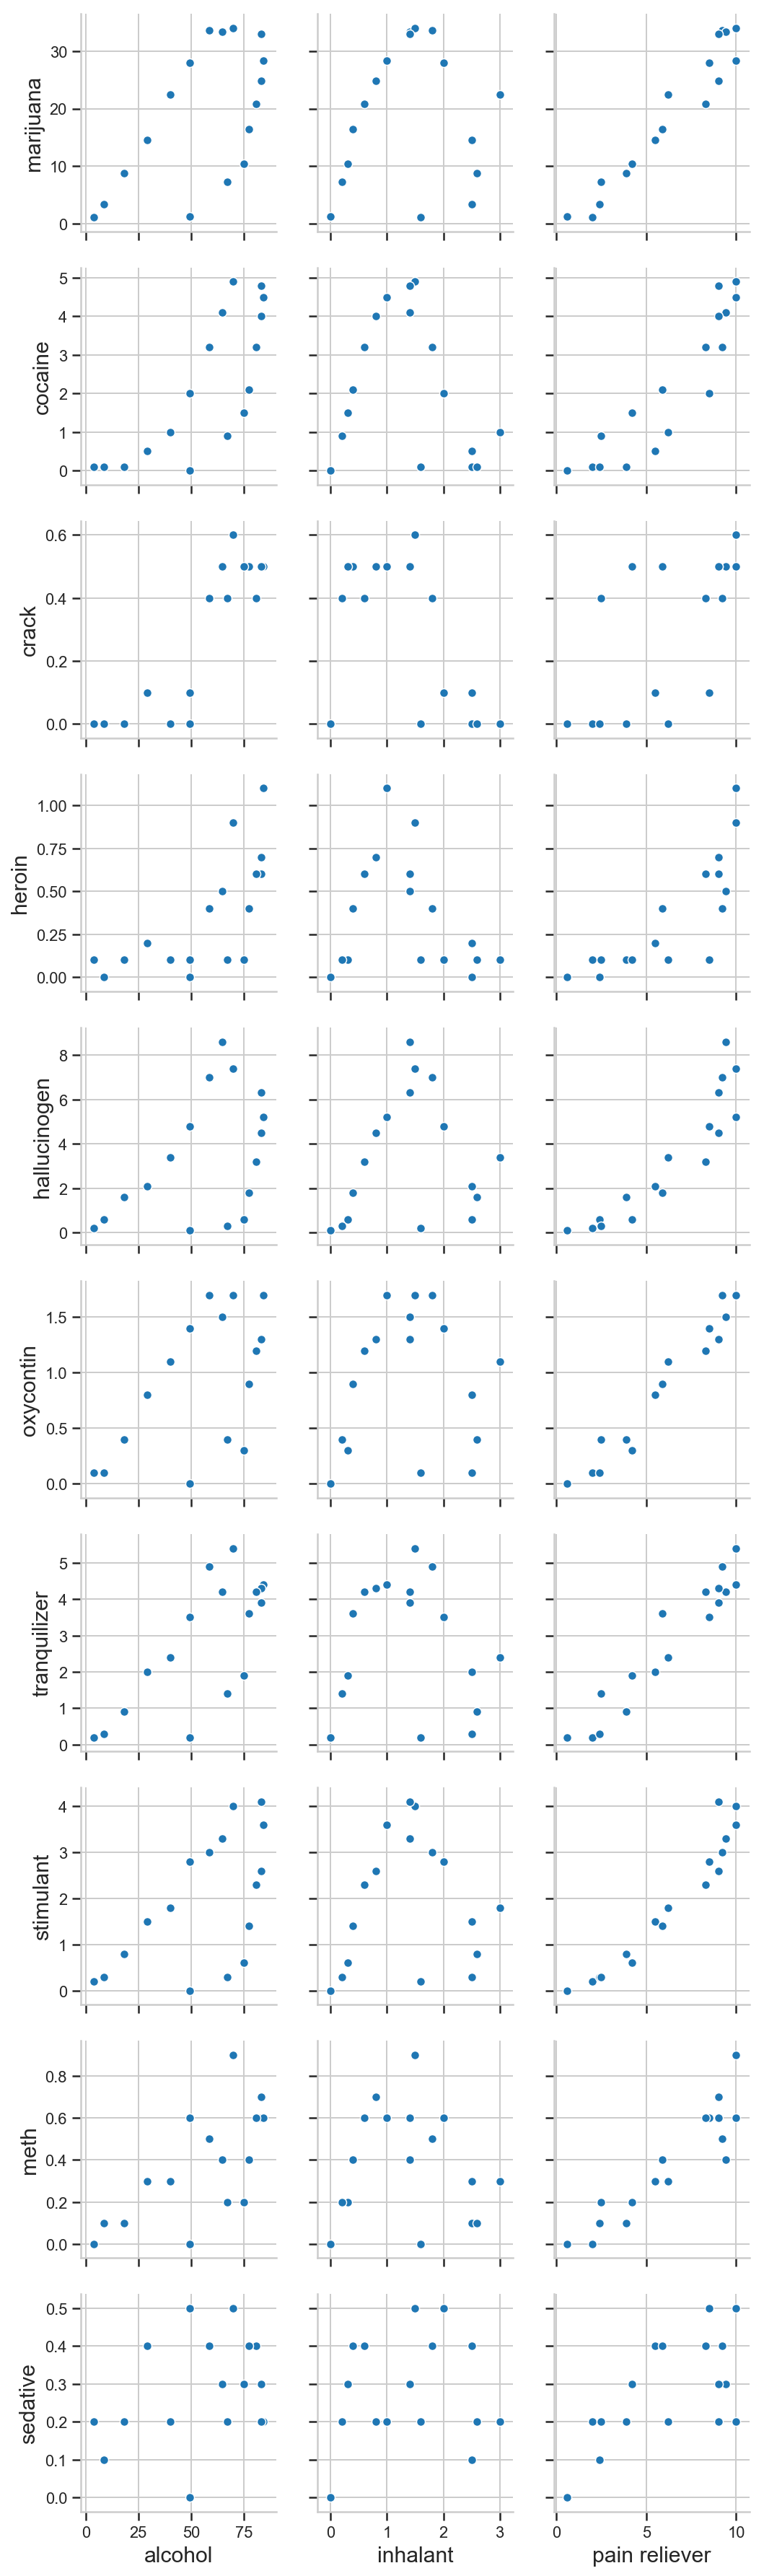

In [49]:
#Look at the relationships between alcohol,inhalant and pain reliever (legally available substances) against drugs
sns.set_context("notebook", rc={"axes.labelsize":15})
sns.pairplot(data=drug_df_freq, x_vars=['alcohol','inhalant','pain reliever'], y_vars=['marijuana','cocaine','crack','heroin','hallucinogen','oxycontin','tranquilizer','stimulant','meth','sedative'])

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]), <a list of 12 Text yticklabel objects>)

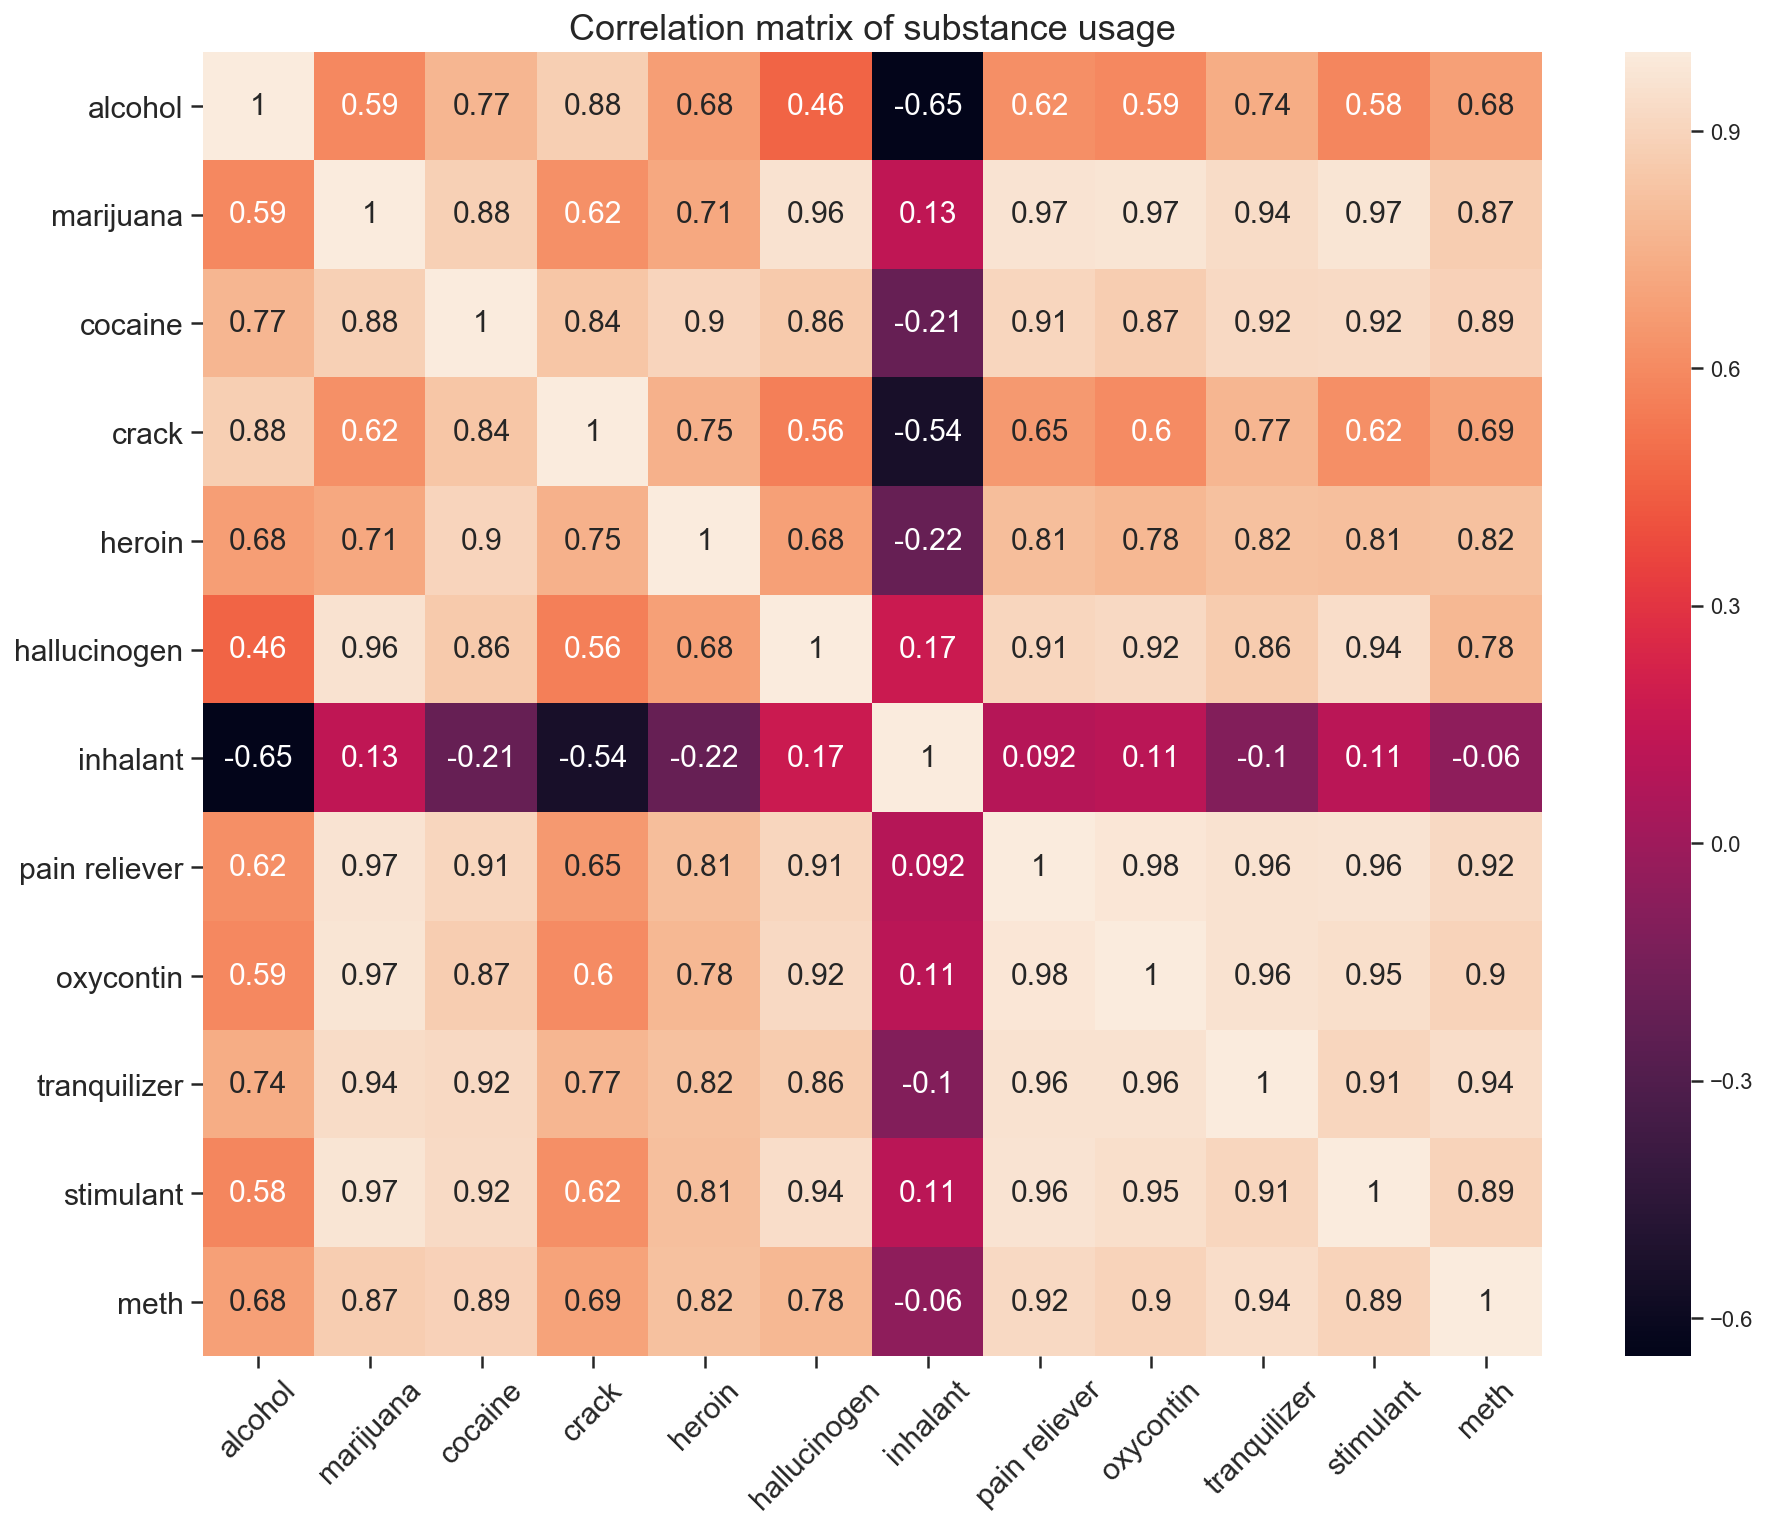

In [50]:
#Have a look at the correlation matrix of the substances
plt.figure(figsize=(15,12))
sns.heatmap(drug_df_freq.loc[:,'alcohol':'meth'].corr(),annot=True, annot_kws={"size": 15})

#Set the title and labels
plt.title('Correlation matrix of substance usage', fontsize=18)
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)

## Observations and Questions:
There is no distinction between use and abuse in this dataset.  
Without any knowledge of how uses within an age group were sampled, we do not know if it is skewed towards a particular age within that group.
Considering that there the percentage values of individual ages were quite different, there might be quite a bit of variation of each statistic for the individual age in age groups.  

Unsurprisingly, alcohol had the highest use rate, since it is legally available (except for those who are below the legal drinking age).  
Marijuana has a markedly higher use rate than all other substances (other than alocohol). Since the survey was conducted in 2012 and marijuana was only legalised in the states of Washington and Colorado in December 2012, it is unlikely that the legalisation had a significant impact on the usage numbers.     
Next substances with significantly higher usage: hallucinogen, pain reliever.  
Inhalant abuse shows a significantly different correlation pattern to other substances. Why?  
Substance usage frequency tapers or drops off around the age group of 20-21 for the vast majority of substances. Why?  

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

### Question and deliverables

Considering how the United States is currently facing an opoid crisis, it might be interesting to take a look at the relationship between pain relievers and marijuana, since medical marijuana is legal in quite a number of states, and some have even been considering medical marijuana as a solution to the opioid crisis*, believing that it could replace the overprescription of pain relievers. 

*https://www.nbcnews.com/storyline/legal-pot/amid-opioid-crisis-researchers-aim-put-medical-marijuana-test-n904276  
*https://www.forbes.com/sites/kevinmurphy/2018/08/02/new-york-points-the-way-in-dealing-with-opioid-crisis/#7490d6528f62

**Limitations**:
Considering that the data was from 2012, a lot has changed, as more states have legalised marijuana and public perception towards marijuana has also changed. Still, it would be interesting to have a better picture of the relationship between the two (in the past) and perhaps compare them to current statistics.


**Question**: Is there a statistically significant correlation between the percentage of pain reliever and marijuana users, across different age groups?

**Deliverables**: Whether or not there is a statistically significant correlation between the percentage of pain reliever and marijuana users. 


Text(0, 0.5, 'Percentage of Marijuana users')

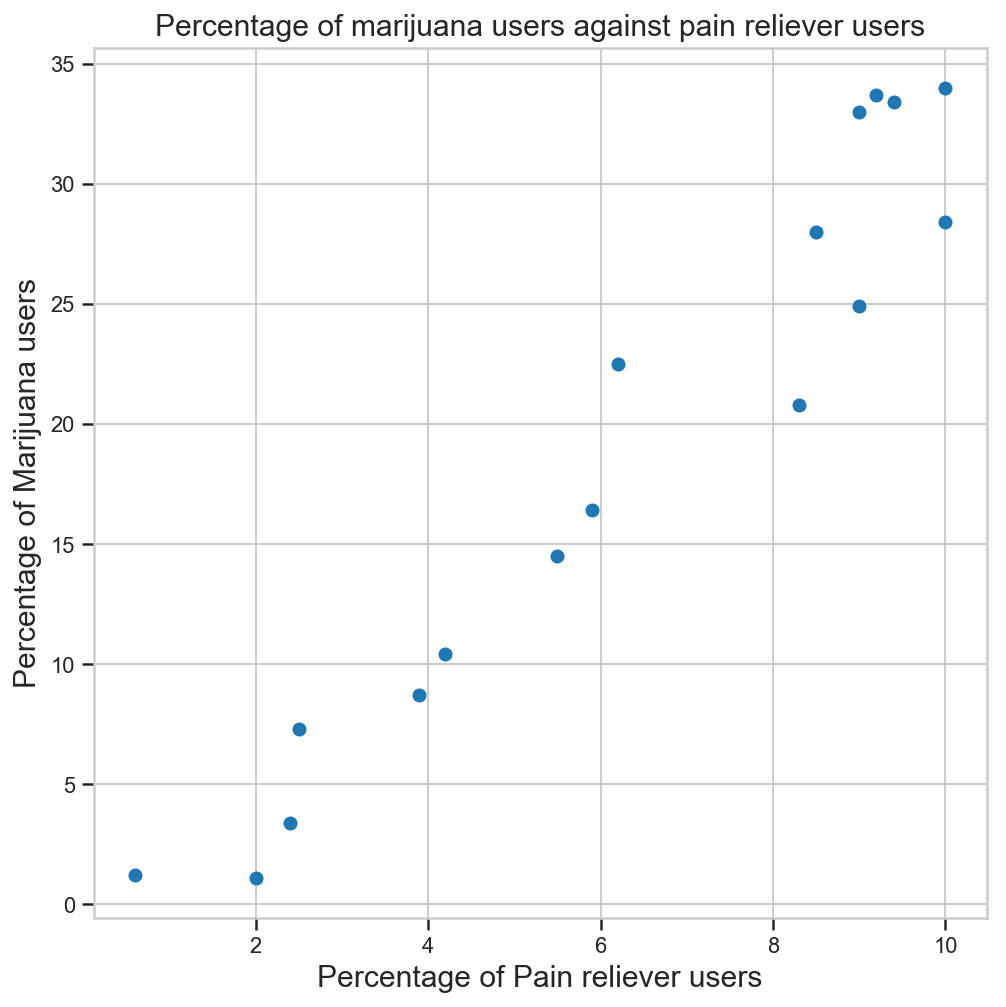

In [51]:
#Look at the relationship between pain relievers and marijuana 
plt.figure(figsize=(8,8))
plt.scatter(drug_df_freq['pain reliever'],drug_df_freq['marijuana'])

#Set the title and labels
plt.title('Percentage of marijuana users against pain reliever users', fontsize =15)
plt.xlabel('Percentage of Pain reliever users')
plt.ylabel('Percentage of Marijuana users')

Looking at the scatterplot between the percentage of pain reliever users and marijuana users, there seems to be a linear relationship between the two variables. 

The null hypothesis is that there is no statistically significant correlation between the percentage of pain reliever users. 

To follow-up, we will look at the Pearson Correlation Coefficient and accompanying p-value.

In [52]:
#Check the Pearson correlation between percentage of pain reliever and marijuana users
print('Pearson Correlation Coefficient: ', stats.pearsonr(drug_df_freq['pain reliever'],drug_df_freq['marijuana'])[0])
print('p-value: ', stats.pearsonr(drug_df_freq['pain reliever'],drug_df_freq['marijuana'])[1])

Pearson Correlation Coefficient:  0.966225865412987
p-value:  3.06488579076475e-10


### Report

Since the p-value is less than 0.05, we can reject the null hypothesis. Therefore, there is a statistically significant relationship between the percentage of pain reliever and marijuana users. Furthermore, looking at the trend of the scatterplot and Pearson Correlation Coefficient, we can see the there is a positive relationship, when one rises, the other tends to as well.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [53]:
#Pull out the rate variable from the sat dataset.
sat_df['Rate'].head()

0    82
1    81
2    79
3    77
4    72
Name: Rate, dtype: int64

### 2. Are there outliers in the dataset? Define, in words, how you numerically define outliers.

Outliers are generally numberically defined as points that are greater than 1.5 times the interquartile range (difference between the third and first quartile).  
However, in more general terms, outliers are points that do not fit into the trend of the rest of the points.


From the boxplots in Question 4, there are no outliers (according to our numerical definition). However, looking at the relationship between variables, there is at least one point that seems to buck the trend of all plots with the Math variable, as can be seen in the pairplot below.

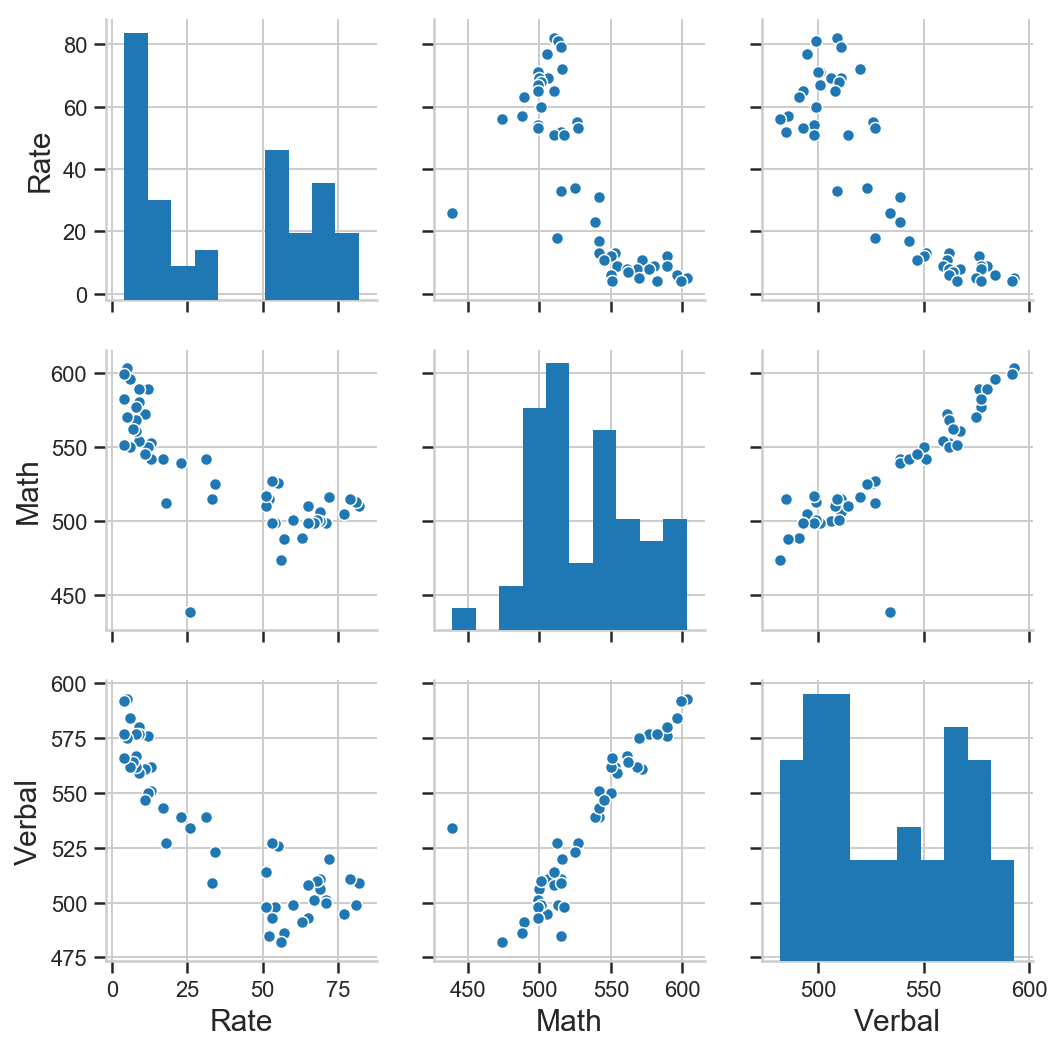

In [54]:
#Plot Rate, Math and Verbal against each other
sns.pairplot(sat_df[['Rate','Math','Verbal']])

In [55]:
#Add another feature, Math divided by Verbal, to evaluate what was observed in the pairplot.
sat_df['Math_Verbal'] = sat_df['Math']/sat_df['Verbal']

[]

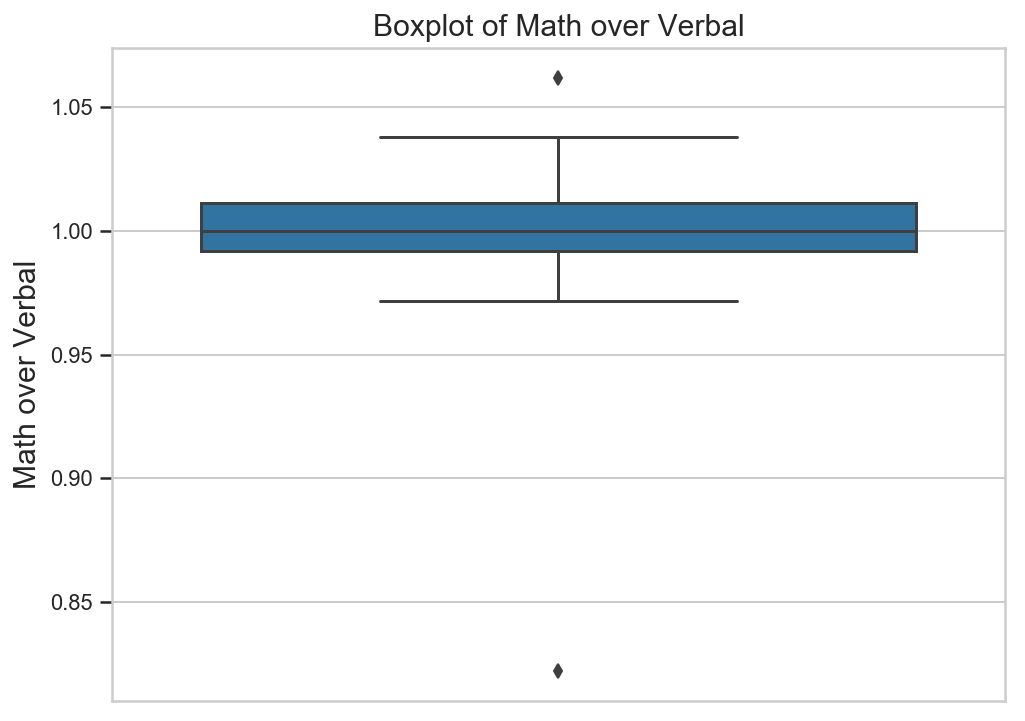

In [56]:
#Create a boxplot to try and identiy the outlier(s)
plt.figure(figsize=(8,6))
ax = sns.boxplot(data = sat_df['Math_Verbal'])

#Set 
plt.title('Boxplot of Math over Verbal', fontsize = 15)
plt.ylabel('Math over Verbal', fontsize = 15)
ax.set_xticks([])

In [57]:
#3. Print out the outliers
sat_df[(sat_df['Math_Verbal']<0.85) | (sat_df['Math_Verbal']> 1.05)]

State  Rate  Verbal  Math  Stand Math  Stand Verbal  Stand Rate  V-M  M-V  \
21    HI    52     485   515   -0.464159     -1.424714    0.544451  -30   30   
27    OH    26     534   439   -2.558551      0.044081   -0.399264   95  -95   

    Math_Verbal  
21     1.061856  
27     0.822097

In [58]:
#Original mean, median and standard deviation
sat_df[['Math','Verbal']].describe()

Math      Verbal
count   51.000000   51.000000
mean   531.843137  532.529412
std     36.287393   33.360667
min    439.000000  482.000000
25%    503.000000  501.000000
50%    525.000000  527.000000
75%    557.500000  562.000000
max    603.000000  593.000000

In [59]:
#Mean, median and standard deviation after outliers removed
sat_df.drop([sat_df.index[21],sat_df.index[27]])[['Math','Verbal']].describe()

Math      Verbal
count   49.000000   49.000000
mean   534.081633  533.469388
std     34.366188   33.336105
min    474.000000  482.000000
25%    505.000000  501.000000
50%    526.000000  527.000000
75%    561.000000  562.000000
max    603.000000  593.000000

### 5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

The mean and median for Math was raised as the outliers had relatively low Math scores (one outlier was previously the minimum score). Since low scores were removed, the variance was reduced as the standard deviation became smaller. 

For Verbal, a similar trend is seem except to a lesser extent. This is due to the points being removed not being as low as the Math scores. In addition, the median remains the same as before. This is due to there being multiple states having a Verbal score of 527 (median score).

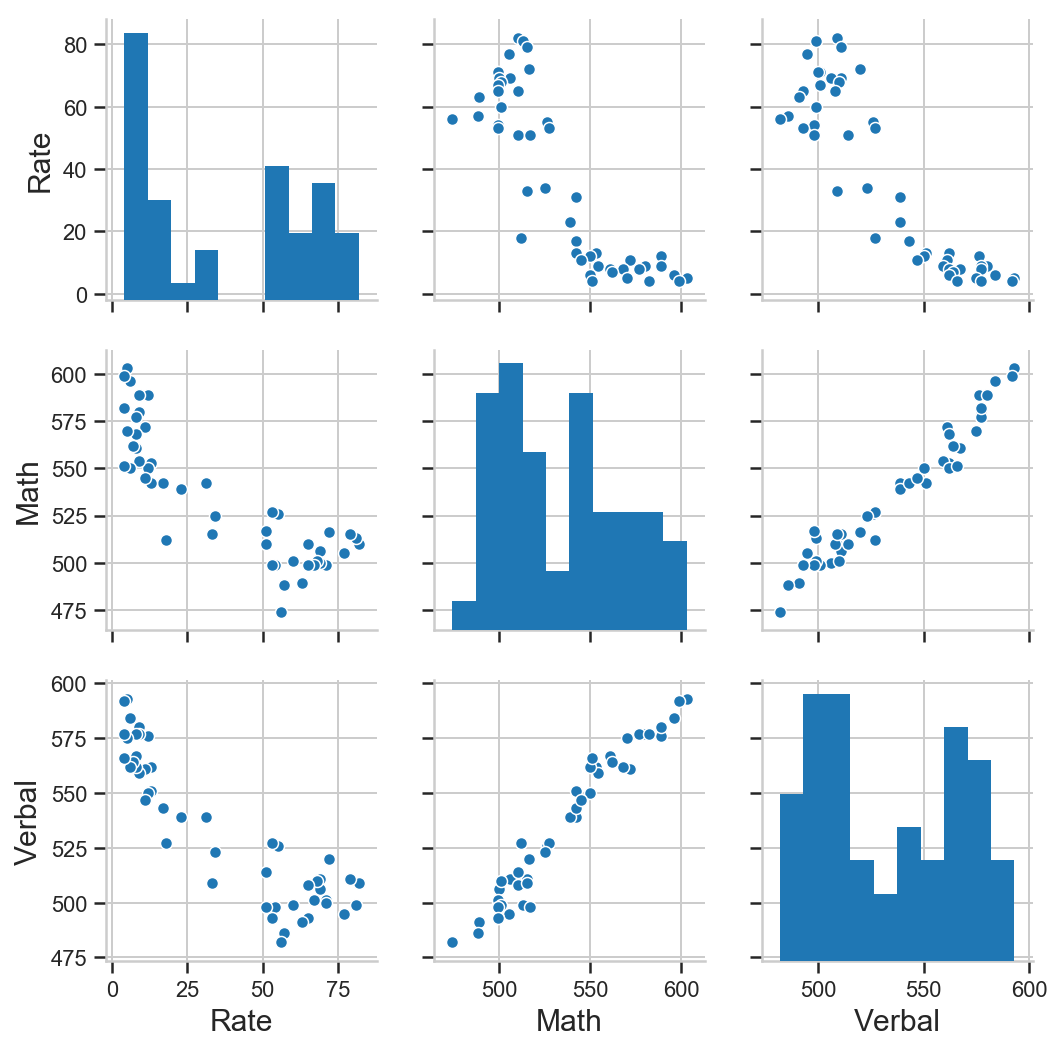

In [60]:
#Relationship between variables after outliers removed
sns.set_context("notebook", rc={"axes.labelsize":15})
sns.pairplot(sat_df.drop([sat_df.index[21],sat_df.index[27]])[['Rate','Math','Verbal']])

While the plot of the "cleaned" data looks like a "better fit", removal of an outlier in this manner would likely be confirmation bias, removing points to make the plot look like what we think it should look like. 

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [61]:
#Calculate and print the Pearson Correlation between the verbal and math. 
print(f"Pearson correlation: {stats.pearsonr(sat_df['Verbal'],sat_df['Math'])[0]}")

Pearson correlation: 0.8999093181811048


### 1.How does the spearman correlation compare to the pearson correlation? 

Spearman correlation tests for a monotonic relationship while Pearson correlation tests for a linear relationship.  
Pearson correlation assumes a normal distribution but Spearman correlation does not require the same assumption.  
Spearman correlation uses ranks and thus can be used with ordinal data, while Pearson uses interval and ratio data.


###  2.Describe clearly in words the process of calculating the spearman rank correlation.

__*If all variables are unique (no duplicate variables)*__  
For two variables A and B,  
Step 1: Give each element a rank, with 1 being for the largest value within that variable's list.  
Step 2: Find the square of the difference between the ranks of each element pair.  
Step 3: Sum all the squared differences from Step 2 and multiply the result by 6.    
Step 4: Deduct one from the square of the sample size, then multiply the result by the sample size.  
Step 5: Divide the result from Step 3 by the result from Step 4.  
Step 6: Deduct the result from Step 5 from (the integer) 1 and the result will be the Spearman Rank Correlation.

__*If there are duplicate variables*__   
For two variables A and B,  
Step 1: Give each element a rank, with 1 being for the largest value within that variable's list.  
Step 2: Find the standard deviations for the list of ranks for each variable.  
Step 3: Divide the Pearson Correlation of the list of variable ranks by the product of the standard deviations from step 2. This gives the Spearman Rank Correlation.

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [62]:
#1. Convert Rate to percentiles and append it as a new column to sat_df
sat_df['R_Percentile'] = sat_df['Rate'].apply(lambda x: stats.percentileofscore(sat_df['Rate'],x))
sat_df.head()

State  Rate  Verbal  Math  Stand Math  Stand Verbal  Stand Rate  V-M  M-V  \
0    CT    82     509   510   -0.601948     -0.705304    1.633353   -1    1   
1    NJ    81     499   513   -0.519275     -1.005058    1.597057  -14   14   
2    MA    79     511   515   -0.464159     -0.645353    1.524463   -4    4   
3    NY    77     495   505   -0.739737     -1.124960    1.451870  -10   10   
4    NH    72     520   516   -0.436602     -0.375574    1.270386    4   -4   

   Math_Verbal  R_Percentile  
0     1.001965    100.000000  
1     1.028056     98.039216  
2     1.007828     96.078431  
3     1.020202     94.117647  
4     0.992308     92.156863

In [63]:
#2. Find the percentile of California in rate.
sat_df[sat_df['State']=='CA'][['State','R_Percentile']]

State  R_Percentile
23    CA     55.882353

### 3. How is percentile related to the spearman rank correlation?
Percentile gives us information about the position and relative positions of elements in the sample or population rather than raw numerical differences. Similarly, The spearman rank correlation is derived from differences in position of elements being compared rather than numerical differences of the raw data.

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

### 1.Why might percentile scoring be useful for dealing with outliers?
Since percentile scoring gives information regarding relative positions, it places **all** points along a scale of 1 to 100. When plotting a variable with outliers, the outliers may make the scale extremely wide, making the plot of the rest of the elements meaningless.   
Percentile scoring woud place the same points along a scale of 1 to 100, allowing us to visualise the relative position of elements on a plot, although it would not provide us information about the actualy numerical difference between elements. 

Text(0, 0.5, 'Percentage of Alcohol Users')

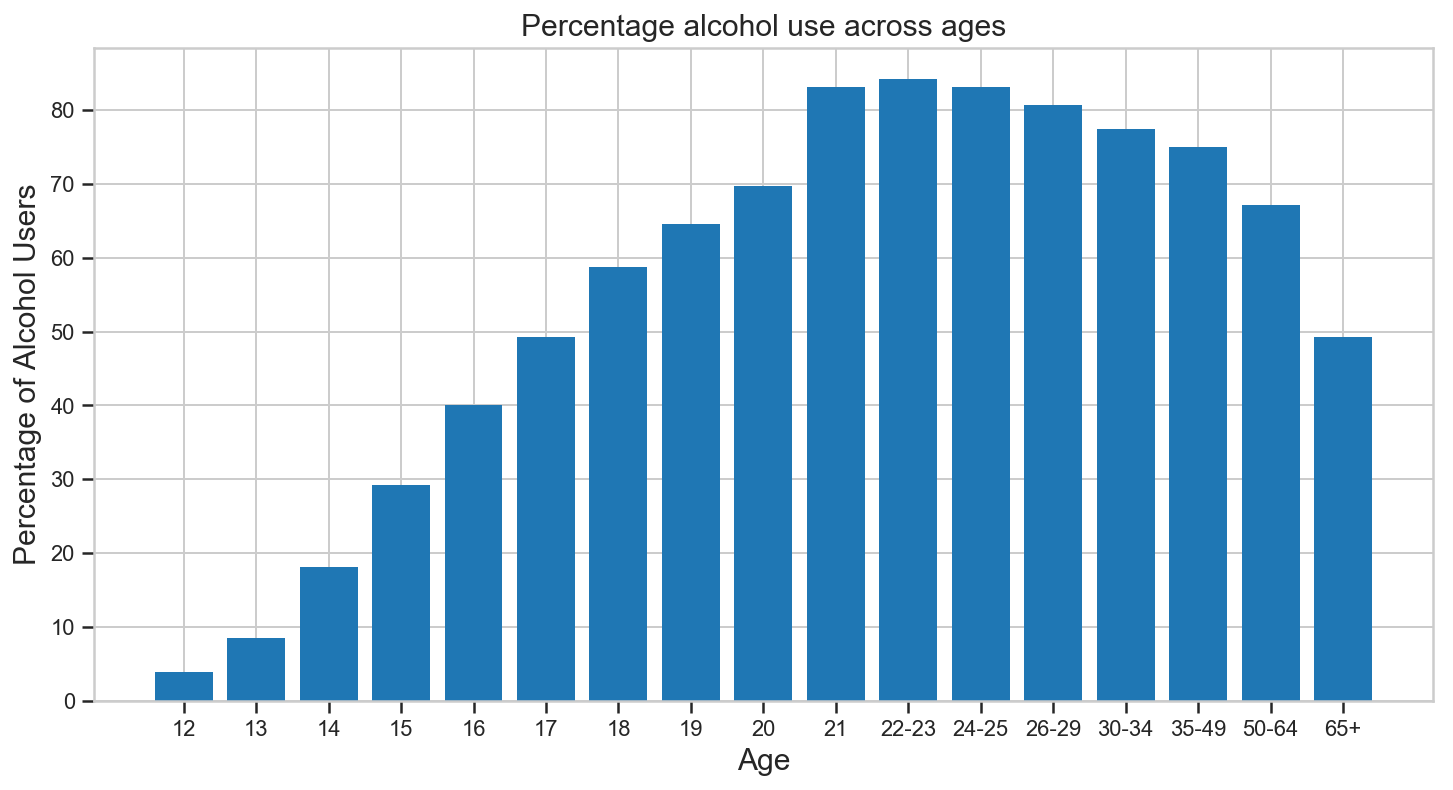

In [64]:
#2. Plot the distribution of percentage alcohol use across ages.
plt.figure(figsize=(12,6))
plt.bar(drug_df['age'], height = drug_df['alcohol-use'])

#Set the title and labels
plt.title('Percentage alcohol use across ages', fontsize = 15)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Percentage of Alcohol Users', fontsize=15)

In [65]:
#Convert the percentage of alcohol uses to percentile and append it as a new column to drug_df
drug_df['R_alcohol'] = drug_df['alcohol-use'].apply(lambda x: stats.percentileofscore(drug_df['alcohol-use'],x))
drug_df[['R_alcohol','alcohol-use']].head()

R_alcohol  alcohol-use
0   5.882353          3.9
1  11.764706          8.5
2  17.647059         18.1
3  23.529412         29.2
4  29.411765         40.1

Text(0, 0.5, 'Percentile')

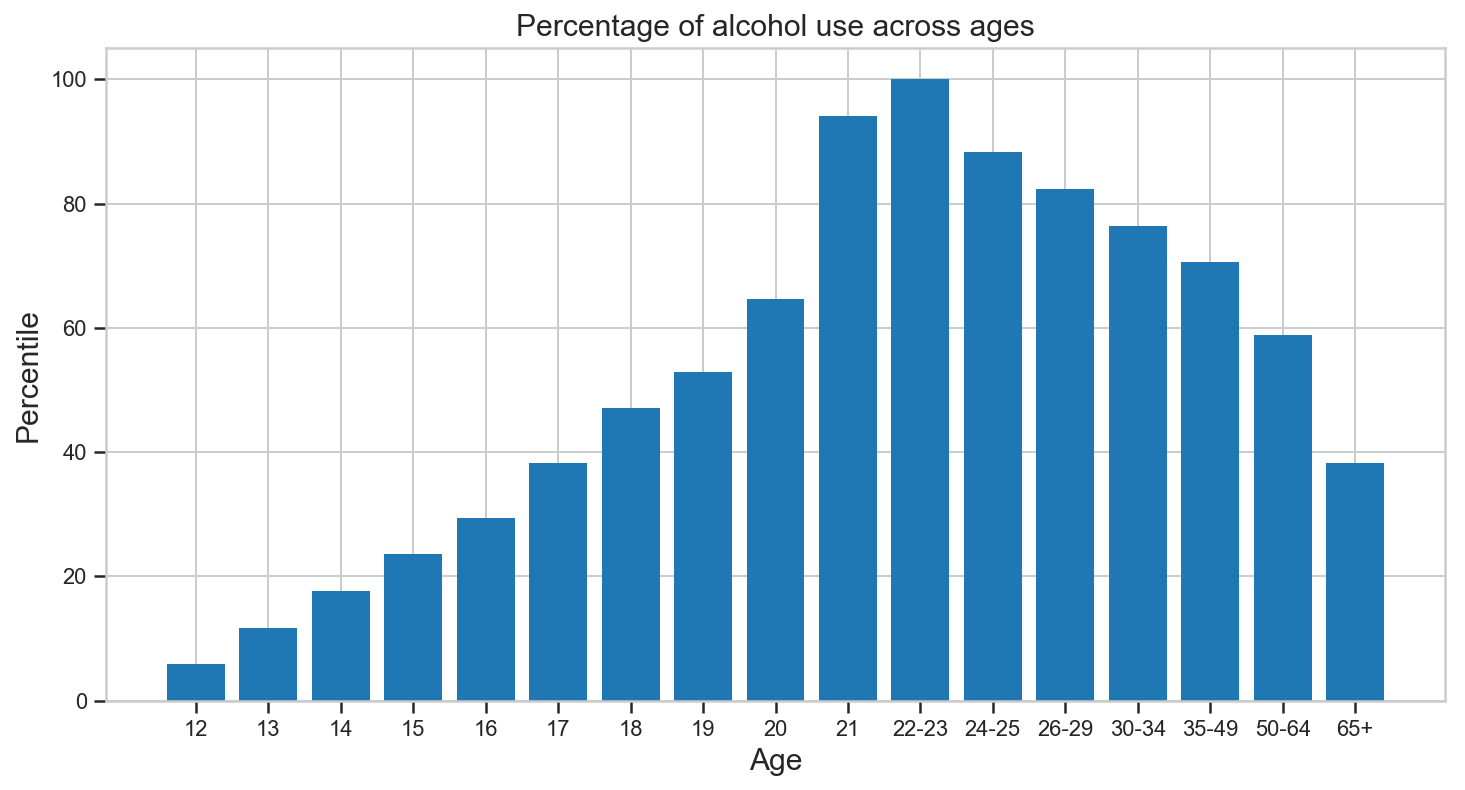

In [66]:
#3. Plot the percentile of percentage alcohol use across ages.
plt.figure(figsize=(12,6))
plt.bar(drug_df['age'], height = drug_df['R_alcohol'])

#Set the title and labels
plt.title('Percentage of alcohol use across ages', fontsize = 15)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Percentile', fontsize=15)

### 4. Describe the effect, visually, of coverting raw scores to percentile.

It transforms the numerical differences between elements into differences of their relative positions.   
This causes the differences between bars to be in multiples of equally spaced steps, since the difference is in positions.  
Converting raw scores to percentiles also scales all the points to be between 0 and 100. 